In [1]:
import os
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Hard coded the number of TCRs per epitope so we don't have to read in the files each time
epitopedata = {'LTDEMIAQY':200,
'GILGFVFTL':1088,
'TTDPSFLGRY':386,
'NQKLIANQF':112,
'HPVTKYIM':96,
'GPRLGVRAT':80,
'KSKRTPMGF':170,
'CINGVCWTV':366,
'TPRVTGGGAM':90,
'SPRWYFYYL':184,
'LLWNGPMAV':376,
'GLCTLVAML':292,
'YLQPRTFLL':534,
'ATDALMTGF':208,
'NLVPMVATV':548,
'RAQAPPPSW':72,
'NYNYLYRLF':88
}

In [3]:
# read peptide data
modeldir = '../methods_results/'

files = [file for file in os.listdir(modeldir) if '.txt' in file]

data_list = dict()

microauc = dict()
rank = dict()

for file in files:
    df = pd.read_csv(modeldir + file,sep="\t", index_col=0)

    modelname = Path(file).stem[:-6]
    
    
    data_list[modelname] = df
    
    microauc[modelname] = df[['MicroAUC']].transpose()
    
    microauc[modelname]['ab'] = 'beta'
    
    microauc[modelname]['cdr'] = 'cdr3'
    
    microauc[modelname]['cluster'] = False
    
    if modelname in ['TCRbase_CDR3ab','TCRbase_CDR123w','TCRbase_CDR123',
                     'netTCR_cdr3ab_no_nc','netTCR_cdr3ab_no_nc','netTCR_cdr3ab','netTCR_cdr123ab','netTCR_cdr123ab_no_nc',
                     'tcrexab','TCRAI','tcrdist3','sonia_paired','TCRGP']:
        microauc[modelname]['ab'] = 'alphabeta'
        
    if modelname in ['tcrexa','diffrbm_alpha','sonia_alpha']:
        microauc[modelname]['ab'] = 'alpha'
        
    if 'cdr123' in modelname:
        microauc[modelname]['cdr'] = 'cdr123'
        
    if 'CDR123' in modelname:
        microauc[modelname]['cdr'] = 'cdr123'
        
    if 'tcrex' in modelname:
        microauc[modelname]['cdr'] = 'vjcdr3'
        
    if 'TCRAI' in modelname:
        microauc[modelname]['cdr'] = 'vjcdr3'
        
    if 'TCRGP' in modelname:
        microauc[modelname]['cdr'] = 'cdr123'
        
    if 'tcrdist3' in modelname:
        microauc[modelname]['cdr'] = 'vjcdr3'
        
    if 'TCRbase' in modelname:
        microauc[modelname]['cluster'] = True
        
    if 'tcrdist' in modelname:
        microauc[modelname]['cluster'] = True
    
    # Some models couldn't produce the rank, others produced invalid values
    if 'Average Rank' in df and modelname != 'TITAN' and modelname != 'diffrbm_alpha' and modelname != 'diffrbm_beta':
        rank[modelname] = df[['Average Rank']].transpose()

microauc_df = pd.concat(microauc)

rank_df = pd.concat(rank)

In [4]:
microauc_df.sort_values(by="_Average").to_csv('microaucs.csv')

/Users/pietermeysman/anaconda3/envs/clustcr/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <BarContainer object of 22 artists> has a label of '_Average' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


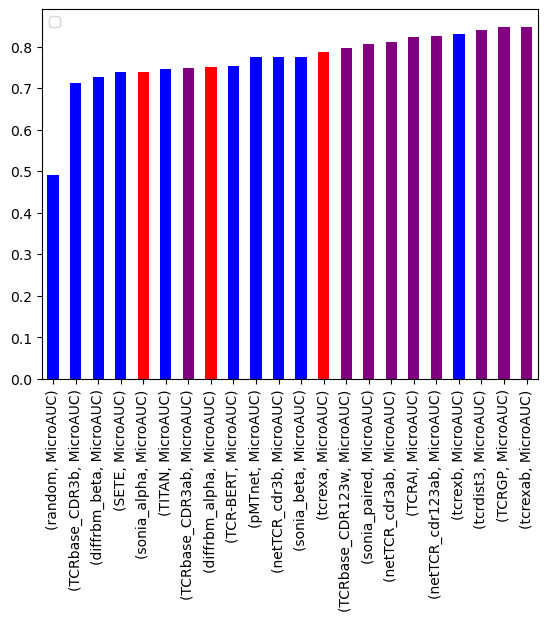

In [5]:
colors = {'alpha': 'r', 'beta': 'b', 'alphabeta': 'purple'}
color=[colors[i] for i in microauc_df.sort_values(by="_Average")['ab']]
microauc_df.sort_values(by="_Average").plot.bar(y="_Average",color=color)
plt.show()

/Users/pietermeysman/anaconda3/envs/clustcr/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <BarContainer object of 15 artists> has a label of '_Average' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


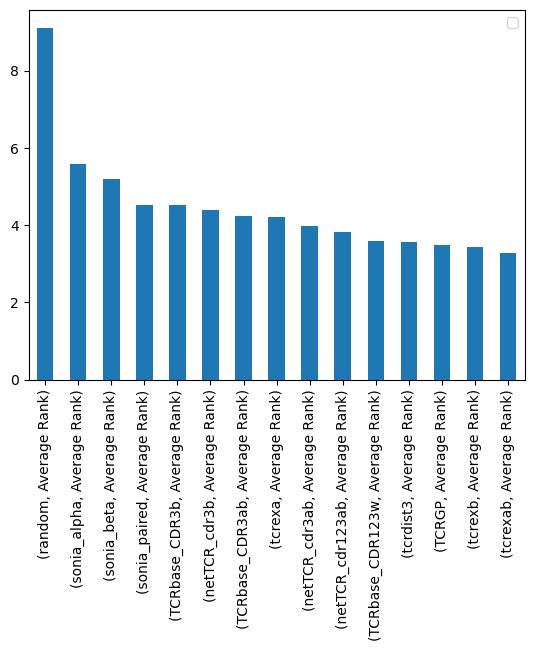

In [6]:
rank_df.sort_values(by="_Average",ascending=False).plot.bar(y="_Average")
plt.show()

rank_df.sort_values(by="_Average").to_csv('epitoperank.csv')

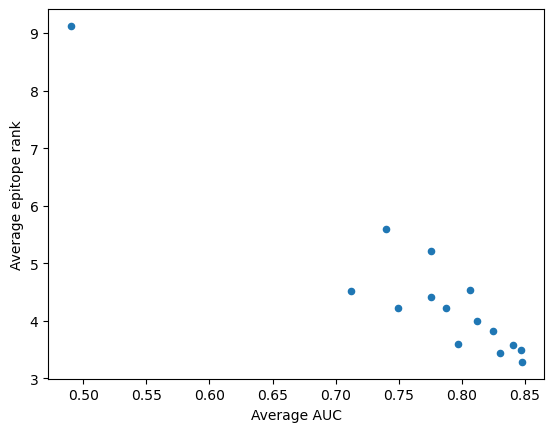

In [7]:
#pd.merge(left=microauc_df,right=rank_df,left_on=microauc_df.index,right_on=rank_df.index)
joined_auc_rank = microauc_df.reset_index(level=[1]).join(rank_df.reset_index(level=[1]), how='inner',rsuffix='_rank')

joined_auc_rank.plot.scatter(x="_Average",y="_Average_rank")
plt.xlabel("Average AUC")
plt.ylabel("Average epitope rank")

#This was too ugly
#for i in range(len(joined_auc_rank)):
#    plt.annotate(joined_auc_rank.index[i], 
#                 (joined_auc_rank.iloc[i]['_Average'] - 0.005, 
#                  joined_auc_rank.iloc[i]['_Average_rank'] + 0.05))

plt.show()

In [8]:
joined_auc_rank.index[1]

'tcrdist3'

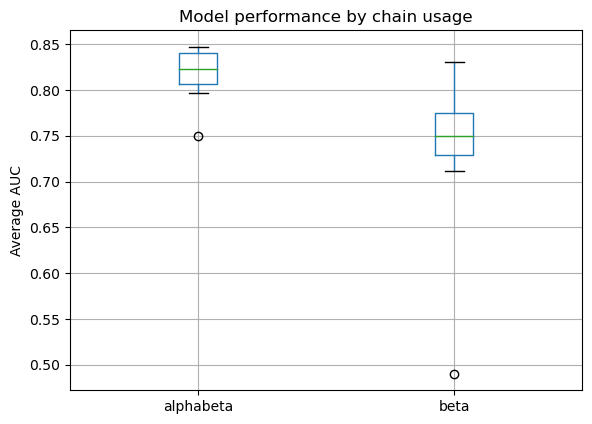

In [9]:
microauc_df[microauc_df.ab != "alpha"].boxplot(column="_Average", by="ab")
plt.title('Model performance by chain usage')
plt.ylabel('Average AUC')
plt.xlabel('')
plt.suptitle('')
plt.show()

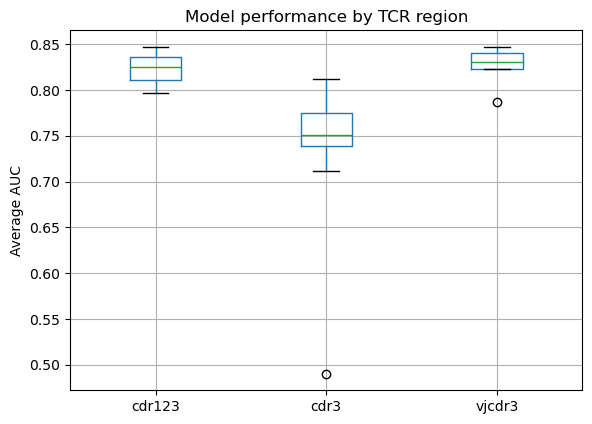

In [10]:
microauc_df.boxplot(column="_Average", by="cdr")
plt.title('Model performance by TCR region')
plt.ylabel('Average AUC')
plt.suptitle('')
plt.xlabel('')
plt.show()

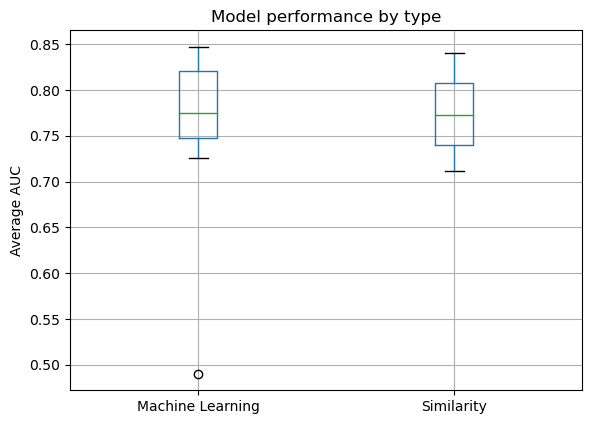

In [11]:
microauc_df.boxplot(column="_Average", by="cluster")
plt.title('Model performance by type')
plt.ylabel('Average AUC')
plt.xticks(ticks=[1,2],labels=['Machine Learning','Similarity'])
plt.suptitle('')
plt.xlabel('')
plt.show()

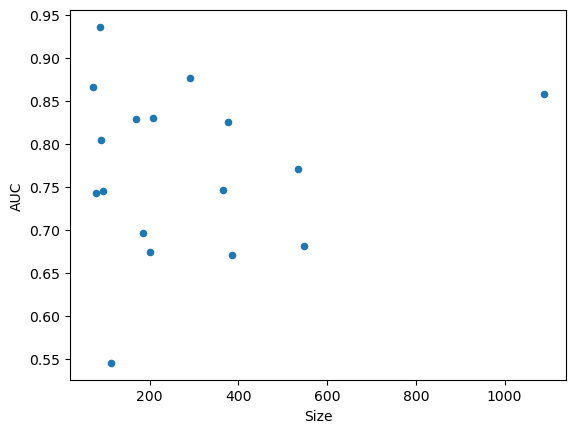

In [12]:
epitopeauc = microauc_df[epitopedata.keys()].apply(np.mean,axis=0)

epidataframe = pd.DataFrame({'AUC':epitopeauc,'Size':epitopedata},index=epitopedata.keys())

epidataframe.plot.scatter(x='Size',y='AUC')
plt.show()

In [13]:
microauc_df[epitopedata.keys()]

,,LTDEMIAQY,GILGFVFTL,TTDPSFLGRY,NQKLIANQF,HPVTKYIM,GPRLGVRAT,KSKRTPMGF,CINGVCWTV,TPRVTGGGAM,SPRWYFYYL,LLWNGPMAV,GLCTLVAML,YLQPRTFLL,ATDALMTGF,NLVPMVATV,RAQAPPPSW,NYNYLYRLF
TITAN,MicroAUC,0.61184,0.888741,0.747006,0.544601,0.679167,0.566845,0.824377,0.669167,0.864035,0.763290,0.746582,0.860287,0.805431,0.761479,0.663531,0.819753,0.863095
sonia_beta,MicroAUC,0.63232,0.849680,0.657615,0.553052,0.688889,0.655971,0.846573,0.713784,0.864035,0.767241,0.831598,0.837395,0.755260,0.858676,0.748708,0.938272,0.979167
tcrdist3,MicroAUC,0.76544,0.904983,0.737308,0.540845,0.837500,0.887701,0.953660,0.856750,0.840643,0.818606,0.891082,0.969502,0.801677,0.940221,0.742966,0.869136,0.927827
TCRbase_CDR123w,MicroAUC,0.71456,0.890148,0.711924,0.510798,0.776389,0.798574,0.896807,0.720334,0.843567,0.757184,0.907741,0.958204,0.747258,0.891175,0.624417,0.829630,0.965774
TCRAI,MicroAUC,0.73600,0.911711,0.748271,0.584038,0.802778,0.891266,0.852414,NaN,0.902047,0.709052,0.877682,0.934574,0.812219,NaN,0.765022,0.844444,0.979167
TCRbase_CDR3b,MicroAUC,0.62816,0.865502,0.601956,0.423474,0.784722,0.695187,0.815810,0.569252,0.558480,0.527299,0.813943,0.830896,0.772928,0.811270,0.553098,0.866667,0.982143
TCR-BERT,MicroAUC,0.62784,0.800980,0.506747,0.515493,0.823611,0.766488,0.810748,0.749573,0.808480,0.565733,0.824174,0.888790,0.800081,0.872987,0.540554,0.962963,0.943452
sonia_alpha,MicroAUC,0.70624,0.855928,0.599174,0.614085,0.704167,0.846702,0.660047,0.761676,0.807018,0.590876,0.800000,0.823364,0.765690,0.723912,0.685334,0.772840,0.857143
tcrexb,MicroAUC,0.67136,0.899636,0.770366,0.541784,0.847917,0.661319,0.973910,0.801310,0.953947,0.837823,0.863332,0.946167,0.806959,0.909511,0.767586,0.883951,0.974702
netTCR_cdr3ab,MicroAUC,0.74528,0.875809,0.661326,0.488263,0.804167,0.821747,0.868380,0.871559,0.809942,0.654813,0.908737,0.924383,0.815276,0.861956,0.690101,0.997531,0.998512


In [14]:
epidataframe

,AUC,Size
LTDEMIAQY,0.674298,200
GILGFVFTL,0.857998,1088
TTDPSFLGRY,0.670823,386
NQKLIANQF,0.544921,112
HPVTKYIM,0.744676,96
GPRLGVRAT,0.742465,80
KSKRTPMGF,0.828041,170
CINGVCWTV,0.745893,366
TPRVTGGGAM,0.803861,90
SPRWYFYYL,0.696300,184
